# An Introduction to classes

### What is a class?
A class is a 'blueprint' for creating objects, that binds together data (variables) and manipulation of such data (via *methods*)

### Class Definition

In [57]:
class MyClass:
    classVariable = "This is a class variable"
    
    def classMethod(self):
        return "Hello Class World"
    

A class can have variables and methods (functions) associated to them. These are collectively called *attributes* of the class.

The syntax is easy: Everything in the indented block belongs to the class.

The class definition must be executed before it can be used. (In principle this enables definitions of classes inside conditional statements etc.)

### Class Instances
You can create an instance of a class with the following function notation:

In [58]:
classInstance = MyClass()

This object now has the methods and variables associated with that class:

In [60]:
print(classInstance.classMethod())
print(classInstance.classVariable)

Hello Class World
This is a class variable


The *self* keyword refers to the instance of the class and is not needed in the parameter list when calling the function. The following two lines are equivalent:

In [62]:
print( classInstance.classMethod() )
print( MyClass.classMethod(classInstance) )

Hello Class World
Hello Class World


Classes can access their own methods and variables using the *self* keyword. These attritbutes can also be accessed from the outside

In [64]:
class MyClass:
    classVariable = "This is a class variable"
    
    def classMethod(self):
        return "Hello Class World"
    
    def anotherClassMethod(self):
        return self.classVariable
    
classInstance = MyClass()

print(classInstance.anotherClassMethod())

classInstance.classVariable = "This can be overwritten"

print(classInstance.anotherClassMethod())

This is a class variable
This can be overwritten


#### Instance Variables
Every instance of a class can also have their own variables - *instance variables* - associated to them. They are created like local variables and only associated with that instance


In [5]:
class MyClass:
    classVariable = "This is a class variable"
    
    def startCounter(self):
        self.counter = 0
    
    def increaseCounter(self):
        self.counter += 1

classInstance = MyClass()

#print(classInstance.counter) # this will fail

classInstance.startCounter()
print(classInstance.counter)

classInstance.increaseCounter()
print(classInstance.counter)

classInstance.secondCounter = 0  # Instance Variables can also be created from outside the class
print(classInstance.secondCounter)

0
1
0


### Initialization
The most important instance variables are usually assigned on initialization. For this purpose, there is a special function for classes, the *\__init\__*(self,...) function. The *\__init\__*(self,...) function is called when the instance is first created:

In [54]:
class MyClass:
    
    def __init__(self):
        self.instanceVariable = "This is an instance variable"
    
    def classMethod(self):
        return "Hello Class World"
    
    def anotherClassMethod(self):
        return self.instanceVariable

classInstance = MyClass()
classInstance.anotherClassMethod()

'This is an instance variable'

The *\__init\__* function is called the *constructor* and can take a list of parameters that need to be passed on during initialization:

In [66]:
class Person:
    def __init__(self, name, age):
        self.name = name 
        self.age = age
    
    def call(self):
        print("Hey " + self.name)

bill = Person("Bill", 53)
janet = Person("Janet", 35)

bill.call()
janet.call()

Hey Bill
Hey Janet


#### Class Variable vs Instance Variable
Care must be taken to differentiate between class variables and instance variables. Class variables are copied on each instantiantion of a class, while instance variables are created from scratch. This can have unintended effects for mutable variables, because their copies are *shallow*, i.e. they are copied by reference:

In [41]:
class Person:
    hobbies = []   # here, hobbies is defined as a class variable
    
    def __init__(self, name):
        self.name = name
        
    def addHobby(self, hobby):
        self.hobbies.append(hobby)


bill = Person("Bill")
bill.addHobby("Yoga")
janet = Person("Janet")
janet.addHobby("Boxing")

bill.hobbies

['Yoga', 'Boxing']

In [40]:
class Person:
    
    def __init__(self, name):
        self.name = name
        self.hobbies = []  # declare hobbies as an instance variable instead

    def addHobby(self, hobby):
        self.hobbies.append(hobby)


bill = Person("Bill")
bill.addHobby("Yoga")
janet = Person("Janet")
janet.addHobby("Boxing")

bill.hobbies

['Yoga']

#### Printing
To simplify output, the classes can define a function that returns a string to represent that object. This is the *\__str\__* function:

In [7]:
class Person:
    def __init__(self, name, age):
        self.name = name      # creates an instance variable
        self.age = age
    
    def __str__(self):
        return self.name + ", " + str(self.age)

chihiro = Person("Chihiro", 10)

print(chihiro)

Chihiro, 10


Another function for a similar purpose is *\__repr\__*, the representation. It is internally used when outputting lists for example

In [9]:
class Person:
    def __init__(self, name, age):
        self.name = name      # creates an instance variable
        self.age = age
    
    def __str__(self):
        return self.name + ", " + str(self.age)
    
    def __repr__(self):
        return "Person: " + self.name

people = [Person("Bill", 53), Person("Janet", 35), Person("Chihiro", 10)]

print(people)

[Person: Bill, Person: Janet, Person: Chihiro]


#### Task 1
Make a class modeling a car with the attributes *model*, *cost*, *fuel efficiency* (km/liter), *condition*, and *mileage*. The *condition* is supposed to model the status of the car in terms of functionality, which of course diminishes over time. Implement a sensible *\__init\__* function and additional functions:
 - Drive: Takes distance and fuel price as an input. The distance is added to the mileage. It also prints an estimate of the fuel cost and adds it to the total cost. The condition of the car deteriorates at a rate of (1%/1000km). If this drops below 0% the car stops working.
 - Repair: The car is taken to the garage. The condition is set back to 100% at a cost of 100€/1%. The cost is printed and added to the total cost.
 - ProjectedLifetimeCost: Outputs the mileage and total cost of the car
 - Honk: Honks at the user
 
If you were to buy a new green Toyota Imaginaris (cost 20k€) with a fuel efficiency of 0.05L/km what would be the approximated cost after driving for 10^5 km?
 And for the newer version Toyota Imaginaris^2 with 0.04L/km?

In [26]:
class Car:
    maintenanceCost = 100/0.01
    deteriorationRate = 0.01/1000
    
    def __init__(self, model, cost, fuel_efficiency, condition=1., mileage=0.):
        self.model = model
        self.cost = cost
        self.fuel_efficiency = fuel_efficiency
        self.condition = condition
        self.mileage = mileage
    
    def drive(self, distance, fuel_price):
        if self.condition <= 0:
            print("Can't drive a dead car")
            return
        self.mileage += distance
        cost = fuel_price * distance * self.fuel_efficiency
        print("Drove the car ", distance, "km for ", cost)
        self.cost += cost
        self.condition -= self.deteriorationRate*distance
        if self.condition <= 0:
            print('Car is dead')
    
    def repair(self):
        cost = self.maintenanceCost*(1.- self.condition)
        print("Repaired the car for ", cost)
        self.cost += cost
        self.condition = 1.
        
    def projectedLifetimeCost(self):
        print("Mileage ", self.mileage, " at a cost of ", self.cost)
    
    def honk(self):
        print('honk honk')

ToyotaIm = Car("Toyota Imaginaris", 2e4, 0.05)
ToyotaIm.drive(1000, 2)
ToyotaIm.repair()
ToyotaIm.projectedLifetimeCost()
ToyotaIm.honk()
ToyotaIm2 = Car("Toyota Imaginaris^2", 2e4, 0.04)
ToyotaIm2.drive(1.01e5, 2)
ToyotaIm2.drive(1.01e5, 2)
ToyotaIm2.repair()
ToyotaIm2.projectedLifetimeCost()
ToyotaIm2.honk()

Drove the car  1000 km for  100.0
Repaired the car for  100.00000000000009
Mileage  1000.0  at a cost of  20200.0
honk honk
Drove the car  101000.0 km for  8080.0
Car is dead
Can't drive a dead car
Repaired the car for  10100.0
Mileage  101000.0  at a cost of  38180.0
honk honk


### Why use classes?
- Enables encapsulation: Bind together data and code that manipulates the data in the same place
- Brings structure into the code, and allows *real-world mapping*
- Polymorphism -> See the following

## Namespaces ?

## Inheritance

In object-oriented programming, inheritance describes the process of basing a class on another class' implemententation, thus *inheriting* its properties. 
The child class inherits all variables and methods from the parent class and can expand on them.

In [95]:
class A:
    text = "This is set in A"
    
    def f(self):
        print(self.text)
    

class B(A):
    text = "This is set in B"
    
    def g(self):
        print("A new function")

a = A()
a.f()
b = B()
b.f()
b.g()

This is set in A
This is set in B
A new function


The child class can also override functions from their parent class:

In [108]:
class A:
    def f(self):
        print("Parent function")
    

class B(A):
    def f(self):
        print("Child function")

a = A()
b = B()

a.f()
b.f()

A.f(b)        # This calls the function in the parent class for b

Parent function
Child function
Parent function


The overwritten function can still be accessed from inside the child class

In [111]:
class A:
    def f(self):
        print("Parent function")
    

class B(A):
    def f(self):
        super().f()
        print("Child function")
    
    def g(self):
        super().f()

b = B()
b.f()

Parent function
Child function


This is especially useful when initializing an object

In [114]:
class A:
    def __init__(self, text):
        self.text = text
    #...
class B(A):
    def __init__(self, text, moreText):
        super().__init__(text)
        self.moreText = moreText

b = B("abc", "def")
print(b.text, b.moreText)

abc def


### Why use inheritance?

- Code Reusability
- Enables Subtyping (IsA relation): Dog > Mammal > Animal
- Logical Hierarchy
- Use Polymorphism: Calling code is agnostic to the specific implementation

## Example: Dark Matter Halos

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

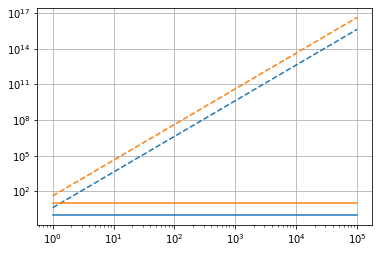

In [9]:
class DMHalo:
    def __init__(self, rho_0):
        self.rho_0 = rho_0
    
    def density(self, r):
        return self.rho_0 * np.ones(np.shape(r))
    
    def mass(self, r):
        integrand = lambda r: r**2 *self.density(r)
        m_0 = quad(integrand, 0., r[0])[0]
        subIntervals = [quad(integrand, r[i-1], r[i])[0] if i > 0 else m_0 for i in range(len(r))]
        return 4.*np.pi*(np.cumsum(subIntervals))

def plotHalo(halo):
    r = np.geomspace(1, 1e5)
    l = plt.loglog(r, halo.density(r))
    plt.loglog(r, halo.mass(r), linestyle='--', color=l[0].get_c())

plotHalo(DMHalo(1))
plotHalo(DMHalo(10))
plt.grid(); plt.show()

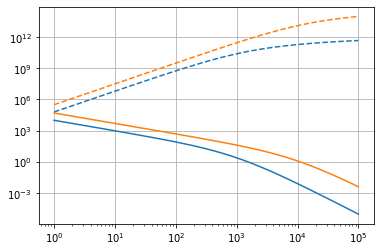

In [10]:
class NFW(DMHalo):
    def __init__(self, rho_0, r_s):
        super().__init__(rho_0)
        self.r_s = r_s
    
    def density(self, r):
        return self.rho_0 / (r/self.r_s) / (1. + r/self.r_s)**2
    

plotHalo(NFW(10, 1e3))
plotHalo(NFW(5, 1e4))
plt.grid(); plt.show()

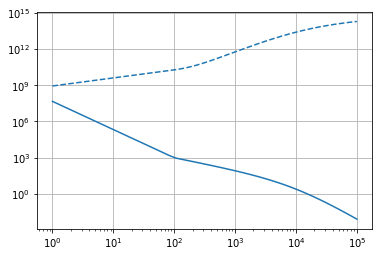

In [11]:
class SpikedNFW(NFW):
    def __init__(self, rho_s, r_s, r_spike, alpha):
        super().__init__(rho_s, r_s)
        self.alpha = alpha
        self.r_spike = r_spike
        self.rho_spike = rho_s * r_s/r_spike / (1.+r_spike/r_s)**2
    
    def density(self, r):
        return np.where( r < self.r_spike, \
                           self.rho_spike * (self.r_spike/r)**self.alpha, \
                        super().density(r))

plotHalo(SpikedNFW(10, 1e4, 1e2, 7./3.))
plt.grid(); plt.show()

#### Task 2
Implement a mass function inside the classes and plot it alongside the density profile.